In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats

In [4]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Correlation Analysis

(1) heat map

In [42]:
df_without_target = df.drop(['PassengerId', 'Survived', 'Sex', 'SibSp', 'Parch'], axis=1)
fare_data = df['Fare']

/var/folders/yz/0g34_v5d6dq2n08tpswpb8sw0000gn/T/ipykernel_2138/3073534201.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_without_target.corr(method = 'pearson'), cmap = 'viridis')


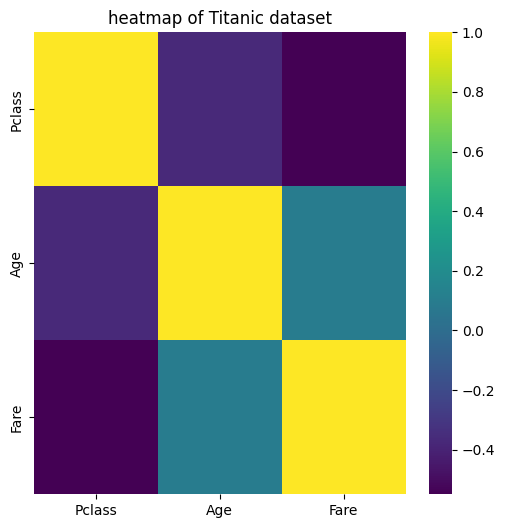

In [12]:
plt.figure(figsize=(6,6))
sns.heatmap(df_without_target.corr(method = 'pearson'), cmap = 'viridis')
plt.title('heatmap of Titanic dataset')
plt.show()

(2)cluster map

/var/folders/yz/0g34_v5d6dq2n08tpswpb8sw0000gn/T/ipykernel_2138/3367842375.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.clustermap(df_without_target.corr(method='pearson'), annot = True, cmap ='viridis')


<Figure size 600x600 with 0 Axes>

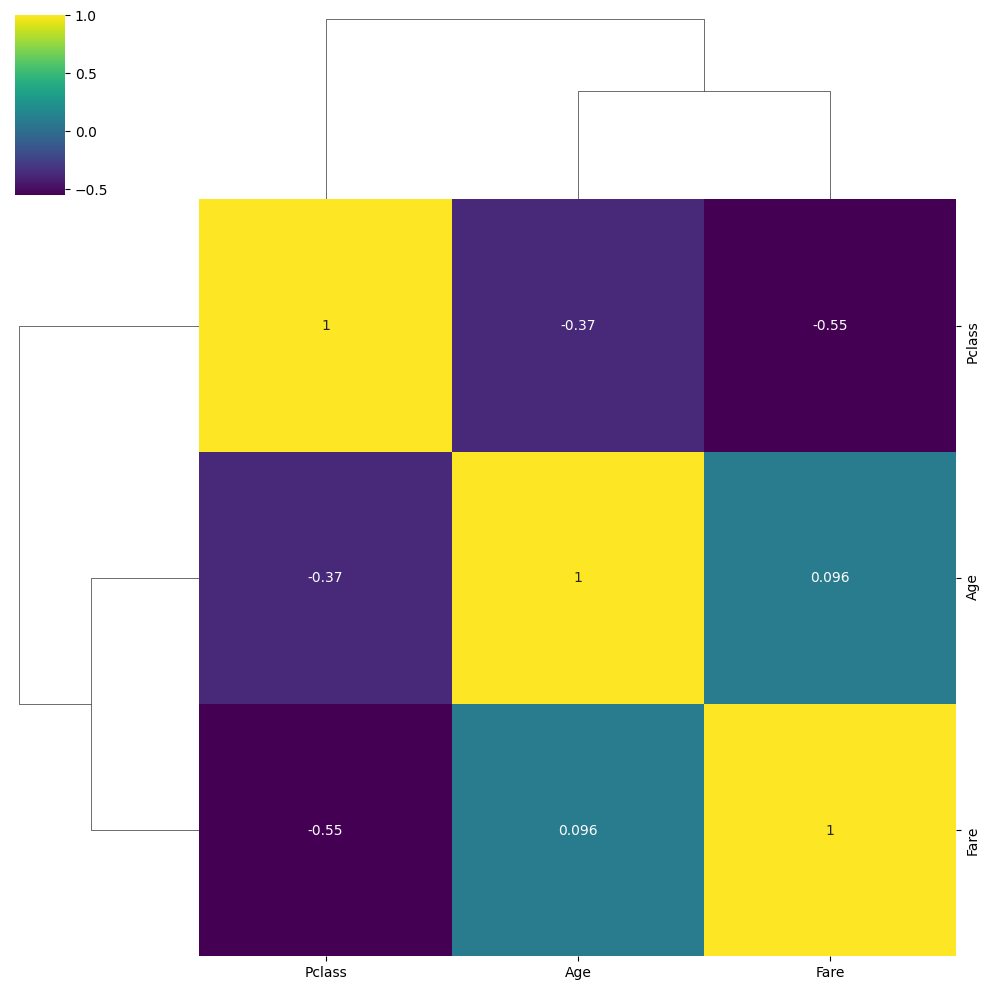

In [14]:
plt.figure(figsize=(6,6))
sns.clustermap(df_without_target.corr(method='pearson'), annot = True, cmap ='viridis')
plt.show()

(3)Normality test

In [38]:

rand_normal = np.random.normal(loc=1, scale=2, size=1000)
rand_f = np.random.f(dfnum=10, dfden=10, size=1000)


/var/folders/yz/0g34_v5d6dq2n08tpswpb8sw0000gn/T/ipykernel_2138/2519237001.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ax=ax2, a=df['Fare'], color='red', label = 'uniform distribution')


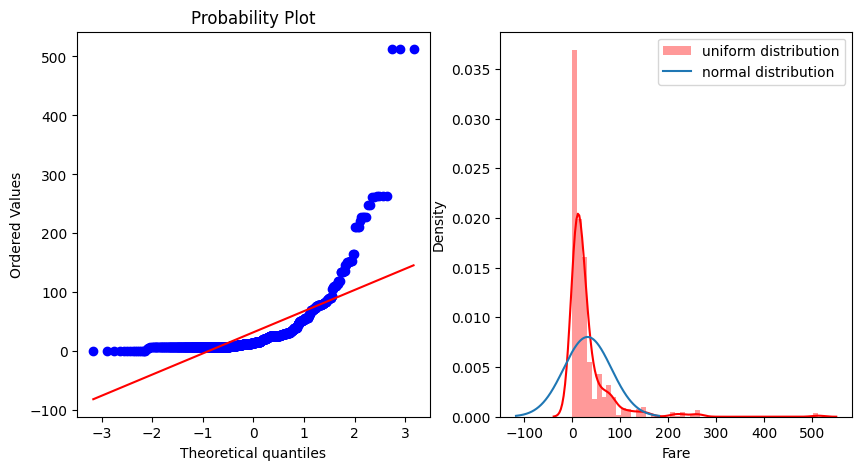

In [49]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

## QQ plot
stats.probplot(df['Fare'], dist=stats.norm, plot=ax1)


sns.distplot(ax=ax2, a=df['Fare'], color='red', label = 'uniform distribution')

# normal distribution
mu = df['Fare'].mean() # average!! 그리스문자 뮤!
variance = df['Fare'].var()
std = variance**0.5

x = np.linspace(mu-3*std, mu+3*std, 1000)
ax2.plot(x, stats.norm.pdf(x, mu, std), label = 'normal distribution')

ax2.legend()

plt.show()

Kolmogorov-Sminorv Test

In [34]:
ks_statistic, p_value = kstest(df['Fare'].dropna(), 'norm', args=(df['Fare'].mean(), df['Fare'].std()))
